# <span style='color:dodgerblue; font-weight:bold;'>Catalog Cross-Selling</span>

### <span style='color:aqua; font-weight:bold;'>Background</span>

Exeter, Inc. is a catalog firm that sells products in a number of different catalogs that it owns. The catalogs number in the dozens, but fall into nine basic
categories:
1. Clothing
2. Housewares
3. Health
4. Automotive
5. Personal electronics
6. Computers
7. Garden
8. Novelty gift
9. Jewelry

The costs of printing and distributing catalogs are high. By far the biggest
cost of operation is the cost of promoting products to people who buy nothing.
Having invested so much in the production of artwork and printing of catalogs,
Exeter wants to take every opportunity to use them effectively. One such opportunity is in cross-selling—once a customer has “taken the bait” and purchases
one product, try to sell them another while you have their attention.
Such cross-promotion might take the form of enclosing a catalog in the
shipment of a purchased product, together with a discount coupon to induce a
purchase from that catalog. Or, it might take the form of a similar coupon sent
by e-mail, with a link to the web version of that catalog.
But which catalog should be enclosed in the box or included as a link in
the e-mail with the discount coupon? Exeter would like it to be an informed
choice—a catalog that has a higher probability of inducing a purchase than simply
choosing a catalog at random.

### <span style='color:aqua; font-weight:bold;'>Assignment</span>

Using the dataset CatalogCrossSell.csv, perform an association rules analysis, and
comment on the results. Your discussion should provide interpretations in
English of the meanings of the various output statistics (lift ratio, confidence, support) and include a very rough estimate (precise calculations are not necessary) of the extent to which this will help Exeter make an informed choice about which catalog to cross-promote to a purchaser.

### <span style='color:aqua; font-weight:bold;'> Import Packages and Load the data</span> 

In [72]:
# Essentials
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model
from mlxtend.frequent_patterns import apriori, association_rules

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv('CatalogCrossSell.csv')

# <span style='color:dodgerblue; font-weight:bold;'>Exploratory Data Analysis</span> 

In [74]:
df.shape

(4998, 10)

In [75]:
df.head()

,Customer Number,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
0,11569,0,1,1,1,1,0,0,1,0
1,13714,0,1,1,1,1,0,1,1,1
2,46391,0,1,1,1,1,0,1,1,1
3,67264,0,0,1,1,1,0,1,1,0
4,67363,0,0,1,0,1,0,1,1,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Customer Number                4998 non-null   int64
 1   Clothing Division              4998 non-null   int64
 2   Housewares Division            4998 non-null   int64
 3   Health Products Division       4998 non-null   int64
 4   Automotive Division            4998 non-null   int64
 5   Personal Electronics Division  4998 non-null   int64
 6   Computers Division             4998 non-null   int64
 7   Garden Division                4998 non-null   int64
 8   Novelty Gift Division          4998 non-null   int64
 9   Jewelry Division               4998 non-null   int64
dtypes: int64(10)
memory usage: 390.6 KB


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Number,4998.0,1.898633e+08,1.004916e+08,11569.0,122609958.5,213445258.0,2.713790e+08,337534044.0
Clothing Division,4998.0,3.301321e-02,1.786889e-01,0.0,0.0,0.0,0.000000e+00,1.0
Housewares Division,4998.0,3.935574e-01,4.885875e-01,0.0,0.0,0.0,1.000000e+00,1.0
Health Products Division,4998.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,1.0
Automotive Division,4998.0,1.348539e-01,3.416017e-01,0.0,0.0,0.0,0.000000e+00,1.0
Personal Electronics Division,4998.0,4.673870e-01,4.989852e-01,0.0,0.0,0.0,1.000000e+00,1.0
Computers Division,4998.0,4.681873e-02,2.112715e-01,0.0,0.0,0.0,0.000000e+00,1.0
Garden Division,4998.0,2.721088e-01,4.450902e-01,0.0,0.0,0.0,1.000000e+00,1.0
Novelty Gift Division,4998.0,2.274910e-01,4.192541e-01,0.0,0.0,0.0,0.000000e+00,1.0
Jewelry Division,4998.0,3.569428e-01,4.791457e-01,0.0,0.0,0.0,1.000000e+00,1.0


# <span style='color:dodgerblue; font-weight:bold;'>Data Pre-Processing</span> 

In [78]:
df.drop(['Customer Number'], axis=1, inplace=True)

### <span style='color:aqua; font-weight:bold;'>Missing Values</span> 

In [79]:
# print the percentage of missing values for instances.
total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
percent = ((df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)[(df.isnull().sum() / df.isnull().count()).sort_values(ascending = False) != 0])
missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
print(missing)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### <span style='color:aqua; font-weight:bold;'>Correlation</span> 

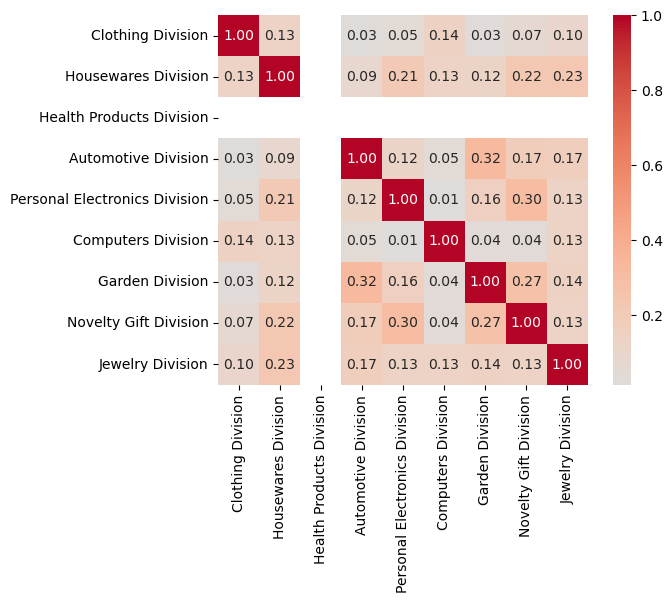

In [80]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', center=0, square=True)
plt.show()

In [81]:
df['Health Products Division'].value_counts()

1    4998
Name: Health Products Division, dtype: int64

# <span style='color:dodgerblue; font-weight:bold;'>Association Rules</span> 

Applying Apriori and Resulting

In [82]:
#set a threshold value for the support value and calculate the support value.
df = apriori(df, min_support = 0.2, use_colnames = True, verbose = 1)
df.sort_values('support', ascending=False)

Processing 39 combinations | Sampling itemset size 3


,support,itemsets
1,1.000000,(Health Products Division)
2,0.467387,(Personal Electronics Division)
8,0.467387,"(Personal Electronics Division, Health Product..."
0,0.393557,(Housewares Division)
6,0.393557,"(Housewares Division, Health Products Division)"
5,0.356943,(Jewelry Division)
11,0.356943,"(Jewelry Division, Health Products Division)"
3,0.272109,(Garden Division)
9,0.272109,"(Health Products Division, Garden Division)"
7,0.235494,"(Personal Electronics Division, Housewares Div..."


In [86]:
#Let's view our interpretation values using the Associan rule function.
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Housewares Division),(Health Products Division),0.393557,1.0,0.393557,1.0,1.0,0.0,inf,0.0
1,(Personal Electronics Division),(Health Products Division),0.467387,1.0,0.467387,1.0,1.0,0.0,inf,0.0
2,(Garden Division),(Health Products Division),0.272109,1.0,0.272109,1.0,1.0,0.0,inf,0.0
3,(Novelty Gift Division),(Health Products Division),0.227491,1.0,0.227491,1.0,1.0,0.0,inf,0.0
4,(Jewelry Division),(Health Products Division),0.356943,1.0,0.356943,1.0,1.0,0.0,inf,0.0
5,"(Personal Electronics Division, Housewares Div...",(Health Products Division),0.235494,1.0,0.235494,1.0,1.0,0.0,inf,0.0
